# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key= '35fa7ca14e1c42fb815ccf83f161b906')

In [4]:
newsapi

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q='bitcoin')
bitcoin_articles

{'status': 'ok',
 'totalResults': 12482,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/steve-dent',
   'title': 'Tesla now accepts Bitcoin in the US',
   'description': "As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla's website and a tweet from CEO Elon Musk.",
   'url': 'https://www.engadget.com/tesla-will-soon-let-you-buy-one-of-its-e-vs-with-bitcoin-082916783.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-03/d3bc78e0-8116-11eb-87fb-7bddf8711d48',
   'publishedAt': '2021-03-24T08:29:16Z',
   'content': 'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]'},
  {'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'You can now buy a Tesla with B

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q='ethereum')
ethereum_articles

{'status': 'ok',
 'totalResults': 3803,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Adi Robertson',
   'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
   'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
   'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
   'publishedAt': '2021-03-15T22:25:02Z',
   'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping b

In [7]:
print(f"Total Bitcoin Articles: {bitcoin_articles['totalResults']}")

Total Bitcoin Articles: 12482


In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu       
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

#Re-arrange columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
1,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
2,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
3,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
4,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858


In [9]:
print(f"Total Ethereum Articles: {ethereum_articles['totalResults']}")

Total Ethereum Articles: 3803


In [10]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

# Re-arrange columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.080030,0.055950,0.036900,0.857200
std,0.440137,0.073811,0.080967,0.227188
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.853000
50%,0.000000,0.025000,0.000000,0.901000
75%,0.348750,0.078250,0.016250,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.197020,0.076950,0.031150,0.89195
std,0.406770,0.067969,0.047117,0.07006
min,-0.557400,0.000000,0.000000,0.75400
25%,-0.038275,0.040500,0.000000,0.85600
50%,0.296000,0.077000,0.000000,0.91650
75%,0.449150,0.090250,0.066500,0.92750
max,0.831600,0.246000,0.145000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum @ .0769

Q: Which coin had the highest compound score?

A: They are both equal @ .8316

Q. Which coin had the highest positive score?

A: They are both equal @ .246

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
stop_words=nltk.corpus.stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append('chars')


In [35]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in stop]
    
    # Remove the stop words
    #stop_words = set(stopwords.words('english'))
    #word_tokens = word_tokenize('chars')
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #filtered_sentence = []
    #for w in word_tokens:
        #if w not in stop_words:
            #filtered_sentence.append(w)
    
    return tokens

In [37]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [40]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer) 
bitcoin_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873,"[promised, earlier, year, tesla, accepts, paym..."
1,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935,"[inevitable, ha, happened, purchase, tesla, ve..."
2,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950,"[tesla, made, headline, earlier, year, took, s..."
3,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
4,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."


In [41]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
1,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, thing, get, hackedthats, h..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [48]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigrams_counts_bitcoin = Counter(ngrams(tokenizer(bitcoin_df['text'].str.cat()), n=2))
print(dict(bigram_counts_bitcoin))


{('promised', 'earlier'): 1, ('earlier', 'year'): 2, ('year', 'tesla'): 1, ('tesla', 'accepts'): 1, ('accepts', 'payment'): 1, ('payment', 'bitcoin'): 1, ('bitcoin', 'according'): 1, ('according', 'teslas'): 1, ('teslas', 'website'): 1, ('website', 'tweet'): 1, ('tweet', 'ceo'): 1, ('ceo', 'elon'): 1, ('elon', 'musk'): 2, ('musk', 'subsequent'): 1, ('subsequent', 'tweet'): 1, ('tweet', 'musk'): 1, ('musk', 'said'): 1, ('said', 'bitcoin'): 1, ('bitcoin', 'paid'): 1, ('paid', 'tesla'): 1, ('tesla', 'charsthe'): 1, ('charsthe', 'inevitable'): 1, ('inevitable', 'ha'): 1, ('ha', 'happened'): 1, ('happened', 'purchase'): 1, ('purchase', 'tesla'): 1, ('tesla', 'vehicle'): 1, ('vehicle', 'bitcointhis'): 1, ('bitcointhis', 'according'): 1, ('according', 'tesla'): 1, ('tesla', 'ceo'): 1, ('ceo', 'pardon'): 1, ('pardon', 'technoking'): 1, ('technoking', 'elon'): 1, ('musk', 'tweeted'): 1, ('tweeted', 'wednesdayyou'): 1, ('wednesdayyou', 'buy'): 1, ('buy', 'tesla'): 1, ('tesla', 'charstesla'): 1, 

In [49]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts_ethereum = Counter(ngrams(tokenizer(ethereum_df['text'].str.cat()), n=2))
print(dict(bigram_counts_ethereum))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'charsfamed'): 1, ('charsfamed', 'auction'): 1, ('auction', 'house'): 1, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, 

In [50]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [51]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(tokenizer(bitcoin_df['text'].str.cat()), 10)

[('bitcoin', 13),
 ('reuters', 9),
 ('ha', 8),
 ('charsby', 6),
 ('photo', 6),
 ('tesla', 5),
 ('stafffile', 5),
 ('virtual', 5),
 ('currency', 5),
 ('illustration', 5)]

In [52]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokenizer(ethereum_df['text'].str.cat()), 10)

[('new', 8),
 ('cryptocurrency', 7),
 ('reuters', 6),
 ('digital', 4),
 ('million', 4),
 ('token', 4),
 ('blockchain', 4),
 ('company', 4),
 ('bitcoin', 4),
 ('one', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [54]:
!pip install wordcloud

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

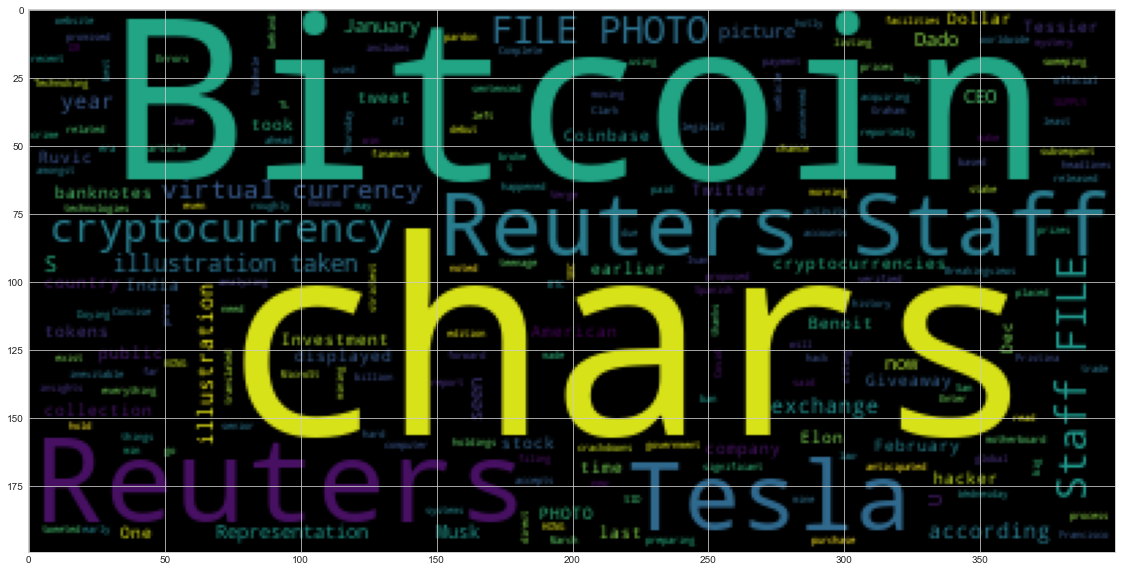

In [56]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_bitcoin = WordCloud().generate(bitcoin_df['text'].str.cat())
plt.imshow(wc_bitcoin)

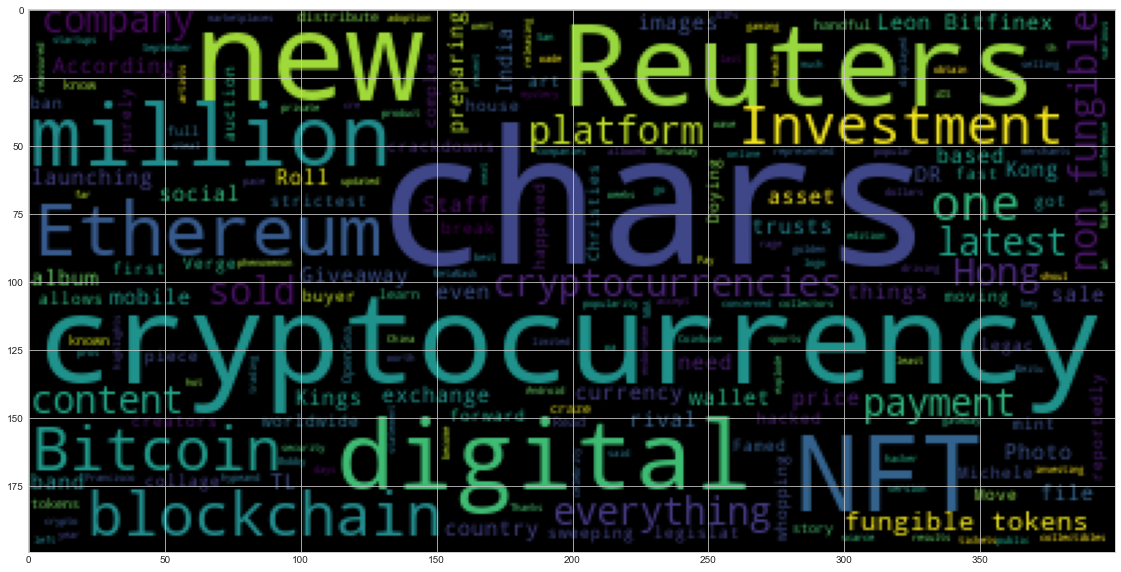

In [57]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_ethereum = WordCloud().generate(ethereum_df['text'].str.cat())
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [58]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [59]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [60]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = bitcoin_df['text'].str.cat()
bitcoin_text

'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars]Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker

In [61]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_NER = nlp(bitcoin_text)


# Add a title to the document
# YOUR CODE HERE!
print(f"Bitcoin Document: {bitcoin_text}")


Bitcoin Document: As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla's website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin. 
This is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday. 
You can now buy a Tesla … [+1648 chars]Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars]One of the strictest crackdowns worldwide
Photo by Michele Doying / The Verge
India is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack
 has just been sentenced to hard time.
Graham Ivan Clark, the teenage hacker who bro

In [62]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_NER, style='ent')

In [63]:
# List all Entities
# YOUR CODE HERE!

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')
            
        
show_ents(bitcoin_NER)

earlier this year - DATE - Absolute or relative dates or periods
Tesla - ORG - Companies, agencies, institutions, etc.
Bitcoin - PERSON - People, including fictional
Tesla - ORG - Companies, agencies, institutions, etc.
Elon Musk - PERSON - People, including fictional
Musk - PERSON - People, including fictional
Tesla - ORG - Companies, agencies, institutions, etc.
Tesla - ORG - Companies, agencies, institutions, etc.
Bitcoin - PERSON - People, including fictional
Elon Musk - PERSON - People, including fictional
Wednesday - DATE - Absolute or relative dates or periods
earlier this year - DATE - Absolute or relative dates or periods
roughly $1.5 billion - MONEY - Monetary values, including unit
early February - DATE - Absolute or relative dates or periods
SEC - ORG - Companies, agencies, institutions, etc.
Photo - PERSON - People, including fictional
Michele Doying - PERSON - People, including fictional
India - GPE - Countries, cities, states
Reuters - ORG - Companies, agencies, institut

---

### Ethereum NER

In [64]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = ethereum_df['text'].str.cat()
ethereum_text

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new star

In [65]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_NER = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
print(f"Ethereum Document: {ethereum_text}")

Ethereum Document: One of the strictest crackdowns worldwide
Photo by Michele Doying / The Verge
India is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]Move fast, break things, get hacked.
That’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]Here's everything you need to know about non-fungible tokens, the latest cryptocurrency craze.
Read the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new

In [66]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_NER, style='ent')


In [67]:
# List all Entities
# YOUR CODE HERE!
show_ents(ethereum_NER)

One - CARDINAL - Numerals that do not fall under another type
Photo - PERSON - People, including fictional
Michele Doying - PERSON - People, including fictional
India - GPE - Countries, cities, states
Reuters - ORG - Companies, agencies, institutions, etc.
Christies - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.
$69 million - MONEY - Monetary values, including unit
5,000 - CARDINAL - Numerals that do not fall under another type
Ethereum - ORG - Companies, agencies, institutions, etc.
here.)OpenSea - GPE - Countries, cities, states
NFT - ORG - Companies, agencies, institutions, etc.
recent weeks - DATE - Absolute or relative dates or periods
these days - DATE - Absolute or relative dates or periods
Kings - PERSON - People, including fictional
NBA - ORG - Companies, agencies, institutions, etc.
millions - CARDINAL - Numerals that do not fall under another type
Ethereum - ORG - Companies, agencies, institutions, etc.
chars]MetaMask - ORG - Compan

---